In [25]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
#reading the file and rearranging so that the column to predict is the last
df1=pd.read_csv("/Users/asmitabasak/Downloads/linear_regression_dataset.csv")
df=df1[['AGE','FEMALE','LOS','RACE','APRDRG','TOTCHG']]
m=len(df.index)
df

,AGE,FEMALE,LOS,RACE,APRDRG,TOTCHG
0,17,1,2,1.0,560,2660
1,17,0,2,1.0,753,1689
2,17,1,7,1.0,930,20060
3,17,1,1,1.0,758,736
4,17,1,1,1.0,754,1194
...,...,...,...,...,...,...
495,0,1,6,1.0,636,5881
496,0,1,2,1.0,640,1171
497,0,1,2,1.0,640,1171
498,0,1,2,1.0,640,1086


In [27]:
#mean normalization
df=((df-df.mean())/df.std())
df.head()

,AGE,FEMALE,LOS,RACE,APRDRG,TOTCHG
0,1.714374,0.975304,-0.246173,-0.151835,-0.316068,-0.029418
1,1.714374,-1.023270,-0.246173,-0.151835,0.766280,-0.279134
2,1.714374,0.975304,1.240380,-0.151835,1.758899,4.445422
3,1.714374,0.975304,-0.543484,-0.151835,0.794320,-0.524222
4,1.714374,0.975304,-0.543484,-0.151835,0.771888,-0.406436


In [28]:
#creating the matrices for x values, y values and the theta values are initialised to zero
X1=df.iloc[:,0:5]
x0=np.ones((X1.shape[0],1))
X=np.concatenate((x0,X1),axis=1)
y=df.iloc[:,5:6]
theta=np.zeros((1,6))
X

array([[ 1.        ,  1.71437426,  0.97530444, -0.24617312, -0.15183465,
        -0.31606803],
       [ 1.        ,  1.71437426, -1.02327023, -0.24617312, -0.15183465,
         0.7662799 ],
       [ 1.        ,  1.71437426,  0.97530444,  1.24037955, -0.15183465,
         1.75889949],
       ...,
       [ 1.        , -0.73185391,  0.97530444, -0.24617312, -0.15183465,
         0.1325736 ],
       [ 1.        , -0.73185391,  0.97530444, -0.24617312, -0.15183465,
         0.1325736 ],
       [ 1.        , -0.73185391, -1.02327023,  0.34844795, -0.15183465,
         0.1325736 ]])

In [29]:
#setting the values of learning rate and number of iterations
alpha=0.01
iterations=1000

In [30]:
#making a fuction to calculate value of cost function
def cost_function(X,y,theta):
    c=(((np.matmul(X,theta.T))-y)**2)/(2*m)
    return np.sum(c)

In [31]:
#making a function to do gradient descent and find out the values of parameters(theta).
x2=np.ones((m,1))
def gradient_descent(X,y,theta,iterations,alpha):
    cost = np.zeros((iterations,1))
    for i in range(iterations):
        k=0
        while (k<6):
            for j in range(0,m):
                x2[j][0]=X[j][k]
            theta[0][k]=theta[0][k]-((alpha/m)*np.sum(x2*((np.matmul(X,theta.T)-y)),axis=0)) 
            cost[i] = cost_function(X, y, theta) 
            k=k+1
    return theta,cost

In [32]:
#the final values of the parameters and cost function
theta_final,cost = gradient_descent(X,y,theta,iterations,alpha)
print(theta_final)

final_Cost = cost_function(X,y,theta_final)
print(final_Cost)

[[-2.78816513e-05  2.40600344e-01 -5.02108484e-02  6.42758302e-01
  -2.80983604e-02 -3.57225990e-01]]
TOTCHG    0.222687
dtype: float64


Text(0, 0.5, 'Cost Function')

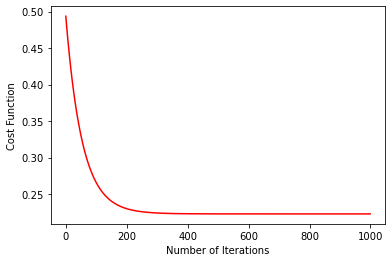

In [33]:
#plotting J(theta) against number of iterations to make sure gradient descent is working properly
fig, ax = plt.subplots()  
ax.plot(np.arange(iterations), cost, 'r')  
ax.set_xlabel('Number of Iterations')  
ax.set_ylabel('Cost Function')  
 